In [1]:
## Data extracted from library(Countr)
load("./data/football.rda")

In [2]:
## EPL score data (2009 - 2016)
str(football)

'data.frame':	3040 obs. of  6 variables:
 $ seasonId     : int  2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 ...
 $ gameDate     : POSIXct, format: "2009-08-15 19:45:00" "2009-08-15 22:00:00" ...
 $ homeTeam     : chr  "Chelsea" "Aston Villa" "Wolves" "Blackburn" ...
 $ awayTeam     : chr  "Hull" "Wigan" "West Ham" "Man City" ...
 $ homeTeamGoals: int  2 0 0 0 0 0 2 1 1 2 ...
 $ awayTeamGoals: int  1 2 2 2 1 1 0 6 0 1 ...


$lambda
[1] 1.575658

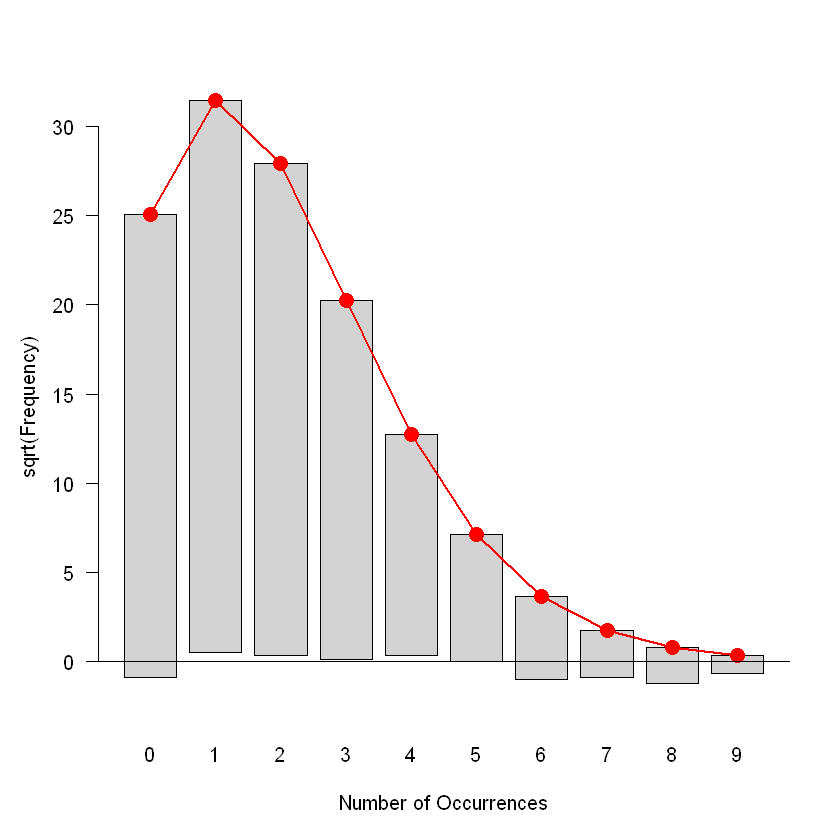

In [4]:
## Fit to a univariate Poisson:
library(vcd)
hTG.fit <- goodfit(football$homeTeamGoals, type="poisson")
hTG.fit$par

plot(hTG.fit)

In [6]:
## Fit to a univariate Poisson, v2:
library(fitdistrplus)
hTG.fit.v2 <- fitdist(football$homeTeamGoals, "pois")
hTG.fit.v2

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters:
       estimate Std. Error
lambda 1.575658 0.02276638

In [7]:
## Fit to a univariate Poisson, v3:

FB.pois0 <- glm(homeTeamGoals ~ 1, 
                data=football, family="poisson")

FB.pois0$coefficients

exp( unname(FB.pois0$coefficients) )

(Intercept) 
  0.4546729

[1] 1.575658

In [8]:
## Focus on season 2009-2010:
EPL09 <- subset(football, seasonId==2009, 
                select=-c(seasonId, gameDate))

EPL09$homeTeam <- factor(EPL09$homeTeam)
EPL09$awayTeam <- factor(EPL09$awayTeam)

str(EPL09)

'data.frame':	380 obs. of  4 variables:
 $ homeTeam     : Factor w/ 20 levels "Arsenal","Aston Villa",..: 7 2 20 4 5 14 15 8 13 17 ...
 $ awayTeam     : Factor w/ 20 levels "Arsenal","Aston Villa",..: 10 19 18 12 16 9 6 1 3 11 ...
 $ homeTeamGoals: int  2 0 0 0 0 0 2 1 1 2 ...
 $ awayTeamGoals: int  1 2 2 2 1 1 0 6 0 1 ...


In [9]:
## All teams:
unique(EPL09$homeTeam)

[1] Chelsea     Aston Villa Wolves      Blackburn   Bolton      Portsmouth 
 [7] Stoke       Everton     Man Utd     Tottenham   Sunderland  Wigan      
[13] Birmingham  Hull        Burnley     Liverpool   Arsenal     Man City   
[19] West Ham    Fulham     
20 Levels: Arsenal Aston Villa Birmingham Blackburn Bolton Burnley ... Wolves

In [10]:
## Summary of data:
home.goals <- EPL09$homeTeamGoals
away.goals <- EPL09$awayTeamGoals

summary(home.goals)
summary(away.goals)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.697   2.000   9.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.074   2.000   6.000 

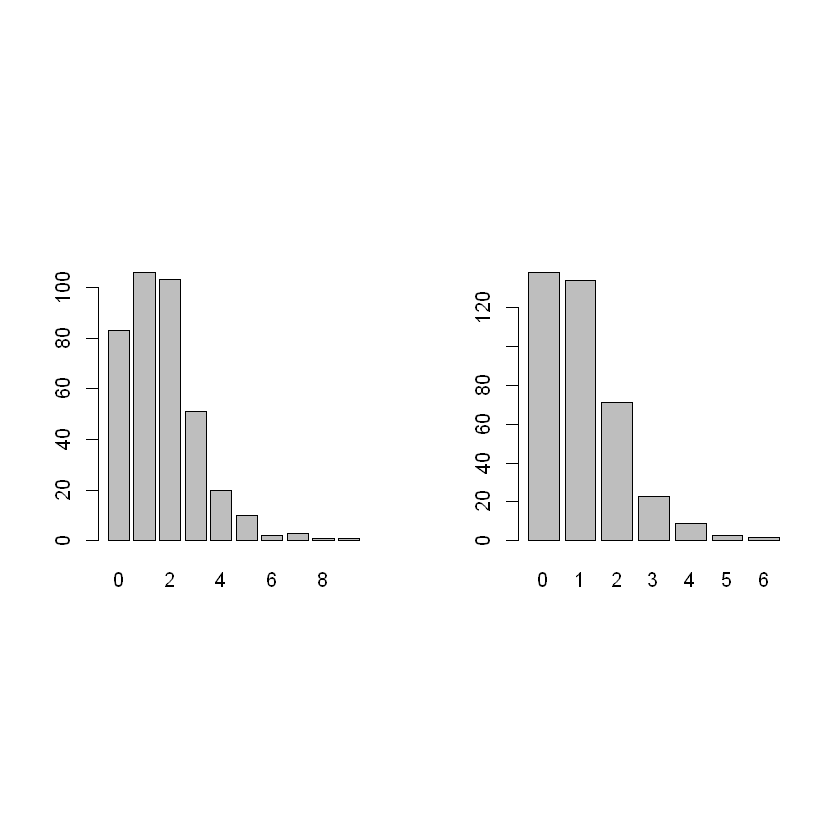

In [11]:
par(mfrow=c(1,2), pty="s")

barplot(table(home.goals))
barplot(table(away.goals))

In [12]:
## Fit EPL09 to two models:
EPL09.pois0 <- glm(homeTeamGoals ~ 1, 
                   data=EPL09, family="poisson")

EPL09.pois1 <- glm(homeTeamGoals ~ homeTeam + awayTeam, 
                   data=EPL09, family="poisson")

In [14]:
## Model comparison:
library(vcdExtra)
LRstats(EPL09.pois0, EPL09.pois1)

anova(EPL09.pois0, EPL09.pois1, test="LR")

AIC      BIC      LR Chisq Df  Pr(>Chisq)  
EPL09.pois0 1282.189 1286.129 519.5425 379 2.049991e-06
EPL09.pois1 1206.287 1359.954 367.6413 341 1.538411e-01

Resid. Df Resid. Dev Df Deviance Pr(>Chi)    
1 379       519.5425   NA       NA           NA
2 341       367.6413   38 151.9012 1.491225e-15

In [15]:
summary(EPL09.pois1)


Call:
glm(formula = homeTeamGoals ~ homeTeam + awayTeam, family = "poisson", 
    data = EPL09)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.43088  -0.85700  -0.07762   0.46245   2.43875  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.732059   0.247077   2.963 0.003048 ** 
homeTeamAston Villa -0.510071   0.235473  -2.166 0.030299 *  
homeTeamBirmingham  -0.915968   0.271339  -3.376 0.000736 ***
homeTeamBlackburn   -0.522476   0.238158  -2.194 0.028248 *  
homeTeamBolton      -0.598421   0.243850  -2.454 0.014126 *  
homeTeamBurnley     -0.611229   0.247082  -2.474 0.013369 *  
homeTeamChelsea      0.336043   0.188848   1.779 0.075169 .  
homeTeamEverton     -0.313501   0.222603  -1.408 0.159031    
homeTeamFulham      -0.568743   0.240882  -2.361 0.018222 *  
homeTeamHull        -0.749471   0.257845  -2.907 0.003653 ** 
homeTeamLiverpool   -0.120244   0.210273  -0.572 0.567425    
homeTeamMan City    

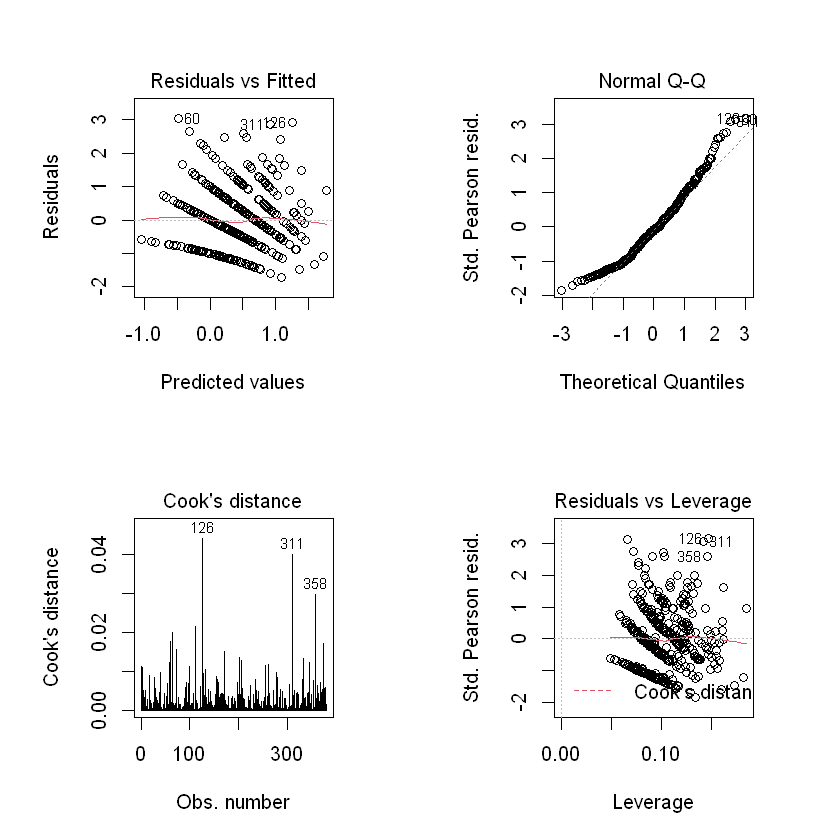

In [16]:
## Basic diagnostic:
par(mfrow=c(2,2), cex=1, pty="s")
plot(EPL09.pois1, which=c(1,2,4,5))

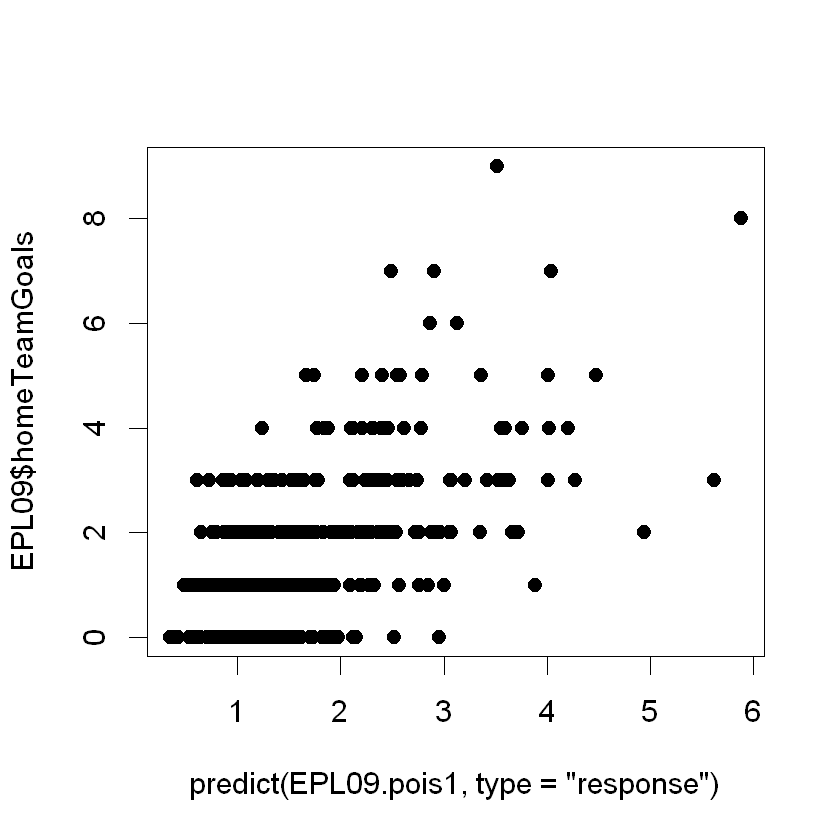

In [17]:
## Compare prediction to observation:
par(cex=1.5, pch=19)
plot(predict(EPL09.pois1, type="response"), 
     EPL09$homeTeamGoals)

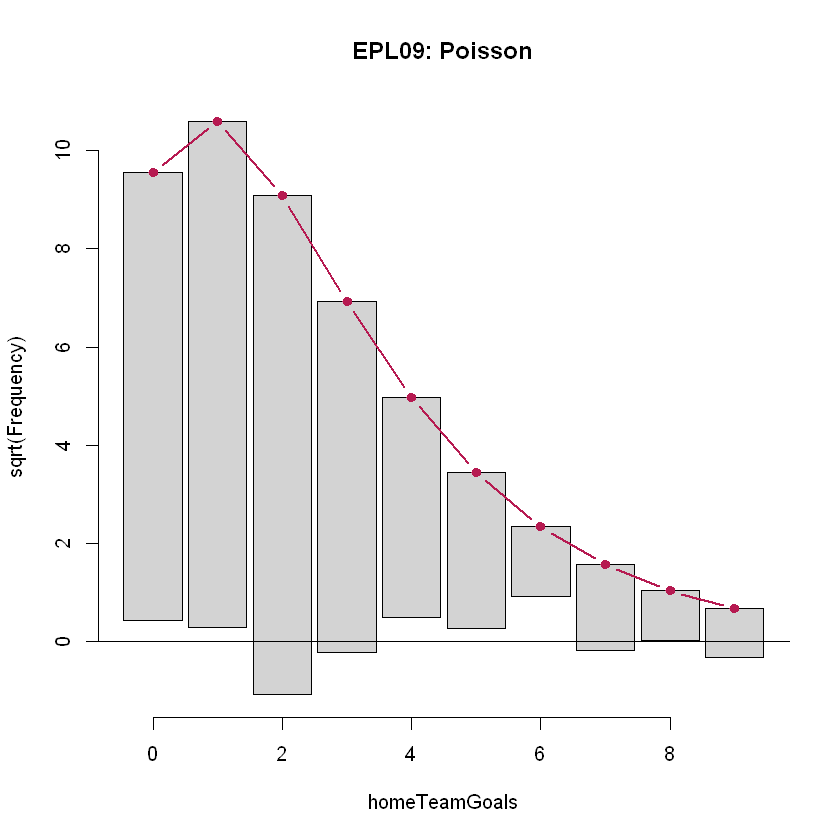

In [19]:
## Rootograms (from library(countreg), but not library(vcd)): 
## for Assessing Goodness of Fit of Probability Models:
library(countreg)
countreg::rootogram(EPL09.pois1, max = 9, main = "EPL09: Poisson")

StudRes    Hat       CookD      
27  -1.3188301 0.1820131 0.008491324
126  2.7230210 0.1464985 0.044082015
311  2.6027934 0.1413403 0.040003812
373  0.9269224 0.1845487 0.005439615

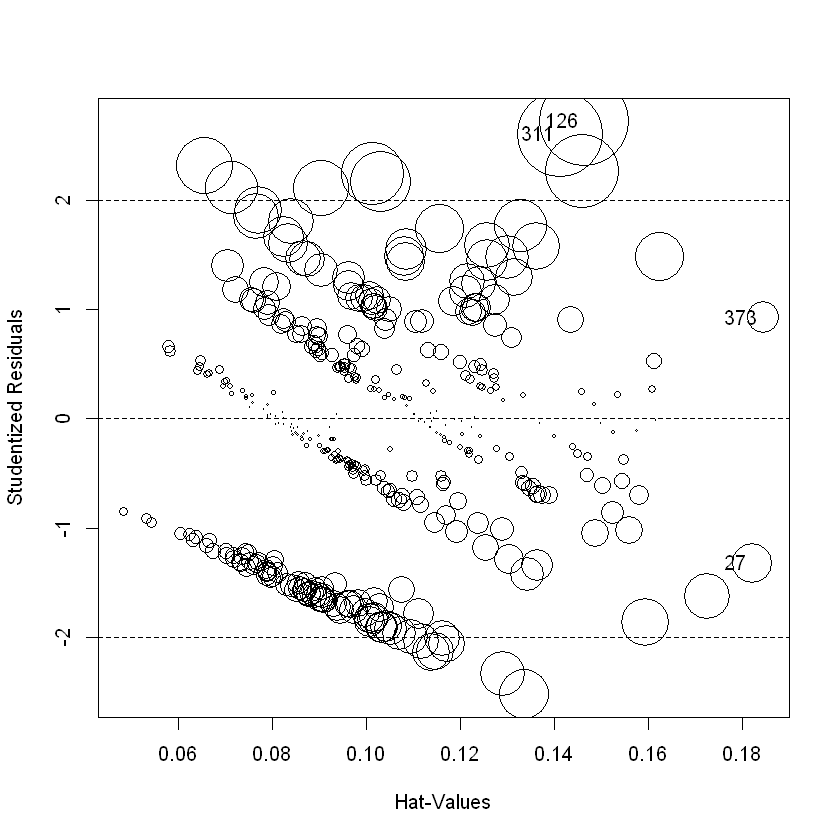

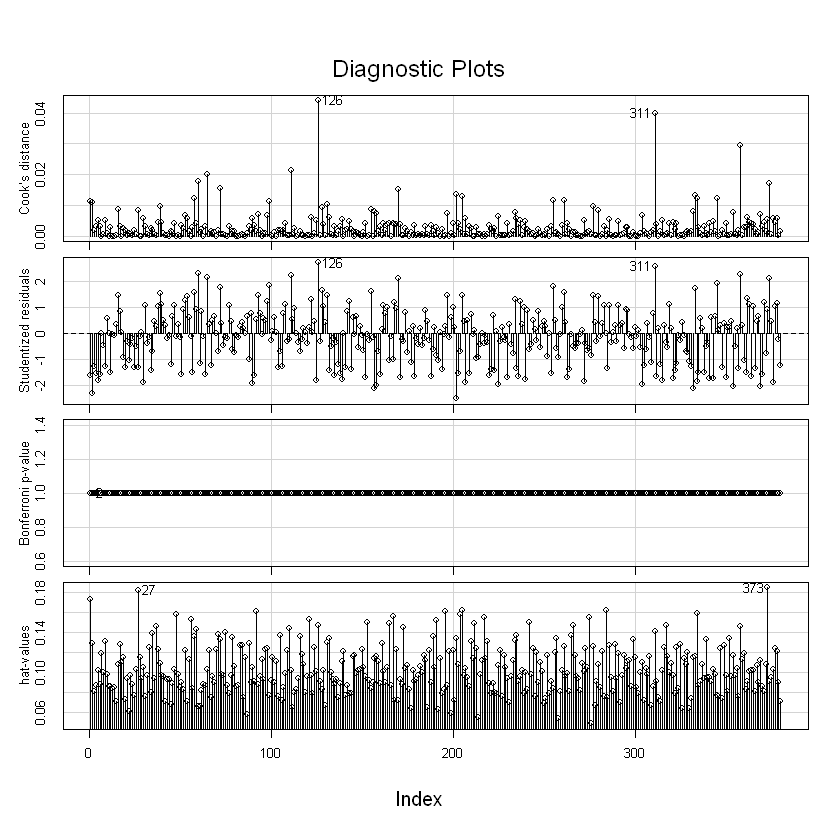

In [21]:
## Some influential plots:
library(car)
influencePlot(EPL09.pois1)
influenceIndexPlot(EPL09.pois1)

In [22]:
## A few "unusual" point:
EPL09[c("27", "126", "311", "373", "358"),]

homeTeam  awayTeam    homeTeamGoals awayTeamGoals
27  Chelsea   Burnley     3             0            
126 Tottenham Wigan       9             1            
311 Chelsea   Aston Villa 7             1            
373 Chelsea   Wigan       8             0            
358 Chelsea   Stoke       7             0

In [23]:
## Check for over-dispresion:

## A rough measure: X^2/df not much greater than 1.
## It requires one to be confident that the lack-of-fit
## is not due to something else.
sum(residuals(EPL09.pois1, type="pearson")^2) / EPL09.pois1$df.residual

[1] 0.9228722

In [25]:
## Test for the null hypothesis of Poisson variation 
## against an alternative that the variance has a particular form
## Var(y) = mu + alpha * mu^ trafo (trafo = 1 or 2)
library(AER)
dispersiontest(EPL09.pois1, 1)
dispersiontest(EPL09.pois1, 2)


	Overdispersion test

data:  EPL09.pois1
z = -2.9225, p-value = 0.9983
alternative hypothesis: true alpha is greater than 0
sample estimates:
     alpha 
-0.1711991 



	Overdispersion test

data:  EPL09.pois1
z = -2.549, p-value = 0.9946
alternative hypothesis: true alpha is greater than 0
sample estimates:
      alpha 
-0.07855184 


In [26]:
## Predict the avearge home goal when the home team is Chelsea, away team is Arsenal:
lam.pred <- predict(EPL09.pois1, data.frame(homeTeam="Chelsea", awayTeam="Arsenal"), type="response")
lam.pred

1 
2.909849

In [27]:
## Extract information from the fitted parameters:
pois1.params <- data.frame(summary(EPL09.pois1)[12])
colnames(pois1.params) <- c('Estimate','Std.Error','z.val','p.val')

pois1.params[order(pois1.params$Estimate, decreasing=TRUE),]

Estimate     Std.Error z.val        p.val       
(Intercept)          0.732058689 0.2470772  2.962874241 3.047811e-03
awayTeamWigan        0.703447302 0.2383831  2.950911536 3.168376e-03
awayTeamBurnley      0.657226118 0.2406124  2.731472408 6.305202e-03
awayTeamHull         0.529232444 0.2457468  2.153567904 3.127407e-02
homeTeamChelsea      0.336042569 0.1888481  1.779433258 7.516876e-02
awayTeamSunderland   0.327398797 0.2563373  1.277218910 2.015250e-01
awayTeamWest Ham     0.324090173 0.2563248  1.264372942 2.060962e-01
awayTeamBlackburn    0.320793855 0.2563124  1.251573517 2.107253e-01
awayTeamBolton       0.290041220 0.2577602  1.125236788 2.604887e-01
awayTeamPortsmouth   0.229489784 0.2608977  0.879615988 3.790674e-01
awayTeamBirmingham   0.221404411 0.2608685  0.848720217 3.960370e-01
awayTeamWolves       0.211797013 0.2608343  0.811998390 4.167926e-01
awayTeamFulham       0.141788471 0.2663125  0.532413808 5.944394e-01
awayTeamTottenham    0.096247291 0.2705313  0.355771418 7.220118e-01
homeTeamMan Utd      0.063657046 0.2004484  0.317573196 7.508087e-01
awayTeamEverton      0.052813673 0.2727682  0.193621091 8.464726e-01
awayTeamStoke       -0.001470943 0.2751202 -0.005346546 9.957341e-01
awayTeamMan City    -0.050961297 0.2805458 -0.181650551 8.558570e-01
homeTeamLiverpool   -0.120244385 0.2102734 -0.571847943 5.674250e-01
awayTeamAston Villa -0.154056309 0.2866110 -0.537510161 5.909153e-01
homeTeamMan City    -0.159778963 0.2129874 -0.750180344 4.531461e-01
homeTeamTottenham   -0.177935281 0.2144413 -0.829762241 4.066732e-01
awayTeamLiverpool   -0.271384362 0.2978423 -0.911168015 3.622069e-01
homeTeamEverton     -0.313500807 0.2226032 -1.408339261 1.590306e-01
awayTeamChelsea     -0.335261494 0.3071579 -1.091495628 2.750549e-01
homeTeamSunderland  -0.388542547 0.2285970 -1.699683846 8.919041e-02
homeTeamWest Ham    -0.453282956 0.2331077 -1.944521452 5.183260e-02
awayTeamMan Utd     -0.480237430 0.3181758 -1.509346018 1.312104e-01
homeTeamAston Villa -0.510071190 0.2354732 -2.166153965 3.029942e-02
homeTeamBlackburn   -0.522476261 0.2381584 -2.193818087 2.824849e-02
homeTeamFulham      -0.568743225 0.2408822 -2.361084100 1.822160e-02
homeTeamBolton      -0.598420789 0.2438502 -2.454051111 1.412569e-02
homeTeamBurnley     -0.611229223 0.2470817 -2.473794179 1.336867e-02
homeTeamPortsmouth  -0.681909549 0.2503232 -2.724116096 6.447384e-03
homeTeamStoke       -0.693210853 0.2502834 -2.769703810 5.610729e-03
homeTeamHull        -0.749471247 0.2578450 -2.906673179 3.652946e-03
homeTeamWigan       -0.881537705 0.2714530 -3.247477834 1.164327e-03
homeTeamBirmingham  -0.915968095 0.2713395 -3.375727658 7.362076e-04
homeTeamWolves      -1.295980038 0.3129115 -4.141682260 3.447677e-05